# Importing package

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import linear algebra and data manipulation
import numpy as np
import pandas as pd

#Import plotting packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
plt.style.use('fivethirtyeight')

#Import common utilities
import math
from collections import Counter

# statsmodels
import pylab
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels as statm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

#Import machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Imputer

# Accuracy Evaluation
from sklearn.model_selection import train_test_split #split
from sklearn.metrics import r2_score, mean_squared_error #metrics
import sklearn.metrics as metrics
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 

# NLP
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import string
import nltk
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 505)

# Import data

In [4]:
listings_df = pd.read_csv('D:\\MyProjects\\01_Airbnb\\Data\\Boston_listings.csv', sep=',')
listings_df.shape   # (3818, 92)

(3585, 95)

# Modelling Price
https://www.kaggle.com/residentmario/modeling-prices

## Designing Features

In [5]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

### Check missing values

In [6]:
def Check_Missing_Data(df):    
    # count all missing values of each column
    total = df.isnull().sum().sort_values(ascending=False)
    # calculate percentage of null values for each column
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

missing_values_df = Check_Missing_Data(listings_df)
missing_values_df

,Total,Percent
neighbourhood_group_cleansed,3585,1.000000
jurisdiction_names,3585,1.000000
license,3585,1.000000
has_availability,3585,1.000000
square_feet,3529,0.984379
monthly_price,2697,0.752301
weekly_price,2693,0.751185
security_deposit,2243,0.625662
notes,1975,0.550907
interaction,1554,0.433473


#### price

In [7]:
listings_df['price'].head()

0    $250.00
1     $65.00
2     $65.00
3     $75.00
4     $79.00
Name: price, dtype: object

In [8]:
listings_df['price'].isnull().sum()

0

In [10]:
listings_df['price'] = listings_df['price'].str.replace("[$, ]", "").astype("float")

In [11]:
listings_df['price'].head()

0    250.0
1     65.0
2     65.0
3     75.0
4     79.0
Name: price, dtype: float64

In [12]:
def count_word(df, column_name):
    # get dictionary of unique values in lists across dataset rows
    values_dict = {}

    for unique_value in df[column_name].unique(): 
        for value in unique_value.replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(','):
            if value in values_dict:
                values_dict[value] = values_dict[value] + 1
            else:
                values_dict[value] = 0
                
    values_sorted = sorted(values_dict.items(), key=lambda kv: kv[1], reverse = True)
    
    return values_sorted 

### Feature matrix with numerical variables

In [20]:
features = listings_df[['host_listings_count', 'host_total_listings_count', 'accommodates', 
                     'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included', 'number_of_reviews',
                     'review_scores_rating']]

In [21]:
features.head()

,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,guests_included,number_of_reviews,review_scores_rating
0,1,1,4,1.5,2.0,3.0,250.0,1,0,NaN
1,1,1,2,1.0,1.0,1.0,65.0,0,36,94.0
2,1,1,2,1.0,1.0,1.0,65.0,1,41,98.0
3,1,1,4,1.0,1.0,2.0,75.0,2,1,100.0
4,1,1,2,1.5,1.0,2.0,79.0,1,29,99.0


#### amenities

In [13]:
amenities_df = listings_df[['amenities','price','id']]
amenities_df.head()

,amenities,price,id
0,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",250.0,12147973
1,"{TV,Internet,""Wireless Internet"",""Air Conditio...",65.0,3075044
2,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",65.0,6976
3,"{TV,Internet,""Wireless Internet"",""Air Conditio...",75.0,1436513
4,"{Internet,""Wireless Internet"",""Air Conditionin...",79.0,7651065


In [14]:
amenity_list = count_word(amenities_df, 'amenities')

In [15]:
len(amenity_list)

46

In [16]:
amenity_list

[('Wireless Internet', 2960),
 ('Heating', 2930),
 ('Kitchen', 2837),
 ('Essentials', 2612),
 ('Smoke Detector', 2585),
 ('Air Conditioning', 2403),
 ('Internet', 2206),
 ('TV', 2200),
 ('Carbon Monoxide Detector', 2146),
 ('Dryer', 2119),
 ('Washer', 2118),
 ('Shampoo', 2087),
 ('Hangers', 1724),
 ('Laptop Friendly Workspace', 1595),
 ('Family/Kid Friendly', 1592),
 ('Iron', 1532),
 ('Hair Dryer', 1526),
 ('Cable TV', 1415),
 ('Fire Extinguisher', 1397),
 ('24-Hour Check-in', 1003),
 ('First Aid Kit', 987),
 ('Free Parking on Premises', 784),
 ('Buzzer/Wireless Intercom', 754),
 ('Elevator in Building', 697),
 ('translation missing: en.hosting_amenity_50', 505),
 ('Pets Allowed', 448),
 ('Lock on Bedroom Door', 443),
 ('Safety Card', 427),
 ('Pets live on this property', 420),
 ('translation missing: en.hosting_amenity_49', 390),
 ('Indoor Fireplace', 370),
 ('Gym', 350),
 ('Breakfast', 300),
 ('Dog(s)', 224),
 ('Doorman', 202),
 ('Cat(s)', 178),
 ('Hot Tub', 160),
 ('Wheelchair Acces

In [17]:
def get_val_from_list(row, column_name, value):
    ''' Fill in dummy column for values '''
    val = 0.0
    try:
        vals = row[column_name].replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(',')
        if value in vals:
            val = 1.0
    except:
        val = 0.0
    return val

In [18]:
# split into columns
for value in amenity_list:
    amenities_df['amenities_' + value[0]] = amenities_df.apply(lambda row: get_val_from_list(row, 'amenities', value[0]),axis=1)

In [19]:
amenities_df.head()

,amenities,price,id,amenities_Wireless Internet,amenities_Heating,amenities_Kitchen,amenities_Essentials,amenities_Smoke Detector,amenities_Air Conditioning,amenities_Internet,amenities_TV,amenities_Carbon Monoxide Detector,amenities_Dryer,amenities_Washer,amenities_Shampoo,amenities_Hangers,amenities_Laptop Friendly Workspace,amenities_Family/Kid Friendly,amenities_Iron,amenities_Hair Dryer,amenities_Cable TV,amenities_Fire Extinguisher,amenities_24-Hour Check-in,amenities_First Aid Kit,amenities_Free Parking on Premises,amenities_Buzzer/Wireless Intercom,amenities_Elevator in Building,amenities_translation missing: en.hosting_amenity_50,amenities_Pets Allowed,amenities_Lock on Bedroom Door,amenities_Safety Card,amenities_Pets live on this property,amenities_translation missing: en.hosting_amenity_49,amenities_Indoor Fireplace,amenities_Gym,amenities_Breakfast,amenities_Dog(s),amenities_Doorman,amenities_Cat(s),amenities_Hot Tub,amenities_Wheelchair Accessible,amenities_Suitable for Events,amenities_Pool,amenities_Smoking Allowed,amenities_Other pet(s),amenities_Free Parking on Street,amenities_Paid Parking Off Premises,amenities_Washer / Dryer,amenities_
0,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",250.0,12147973,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"{TV,Internet,""Wireless Internet"",""Air Conditio...",65.0,3075044,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",65.0,6976,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"{TV,Internet,""Wireless Internet"",""Air Conditio...",75.0,1436513,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"{Internet,""Wireless Internet"",""Air Conditionin...",79.0,7651065,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
features = pd.concat([features,amenities_df.iloc[:,4:]],axis=1)

In [26]:
features.shape

(3585, 56)

In [27]:
features.head()

,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,guests_included,number_of_reviews,review_scores_rating,amenities_Wireless Internet,amenities_Heating,amenities_Kitchen,amenities_Essentials,amenities_Smoke Detector,amenities_Air Conditioning,amenities_Internet,amenities_TV,amenities_Carbon Monoxide Detector,amenities_Dryer,amenities_Washer,amenities_Shampoo,amenities_Hangers,amenities_Laptop Friendly Workspace,amenities_Family/Kid Friendly,amenities_Iron,amenities_Hair Dryer,amenities_Cable TV,amenities_Fire Extinguisher,amenities_24-Hour Check-in,amenities_First Aid Kit,amenities_Free Parking on Premises,amenities_Buzzer/Wireless Intercom,amenities_Elevator in Building,amenities_translation missing: en.hosting_amenity_50,amenities_Pets Allowed,amenities_Lock on Bedroom Door,amenities_Safety Card,amenities_Pets live on this property,amenities_translation missing: en.hosting_amenity_49,amenities_Indoor Fireplace,amenities_Gym,amenities_Breakfast,amenities_Dog(s),amenities_Doorman,amenities_Cat(s),amenities_Hot Tub,amenities_Wheelchair Accessible,amenities_Suitable for Events,amenities_Pool,amenities_Smoking Allowed,amenities_Other pet(s),amenities_Free Parking on Street,amenities_Paid Parking Off Premises,amenities_Washer / Dryer,amenities_
0,1,1,4,1.5,2.0,3.0,250.0,1,0,NaN,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,2,1.0,1.0,1.0,65.0,0,36,94.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,2,1.0,1.0,1.0,65.0,1,41,98.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,4,1.0,1.0,2.0,75.0,2,1,100.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,2,1.5,1.0,2.0,79.0,1,29,99.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
for tf_feature in ['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic',
                   'is_location_exact', 'requires_license', 'instant_bookable',
                   'require_guest_profile_picture', 'require_guest_phone_verification']:
    features[tf_feature] = listings_df[tf_feature].map(lambda s: False if s == "f" else True)

In [29]:
features.shape

(3585, 64)

In [30]:
pd.get_dummies(listings_df['bed_type']).head()

,Airbed,Couch,Futon,Pull-out Sofa,Real Bed
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [31]:
for categorical_feature in ['neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type']:
    features = pd.concat([features, pd.get_dummies(listings_df[categorical_feature])], axis=1)

In [32]:
features.shape

(3585, 110)

In [33]:
for col in features.columns[features.isnull().any()]:
    print(col)

bathrooms
bedrooms
beds
review_scores_rating


In [34]:
for col in features.columns[features.isnull().any()]:
    features[col] = features[col].fillna(features[col].median())

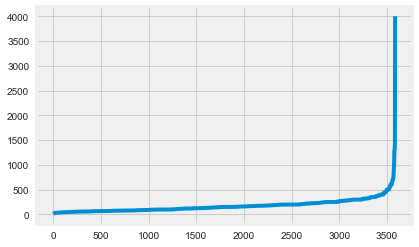

In [35]:
features['price'].sort_values().reset_index(drop=True).plot()

In [36]:
features['price'].sort_values().reset_index(drop=True).head(20)

0     10.0
1     11.0
2     20.0
3     20.0
4     22.0
5     22.0
6     25.0
7     25.0
8     25.0
9     27.0
10    27.0
11    27.0
12    28.0
13    28.0
14    29.0
15    29.0
16    29.0
17    29.0
18    30.0
19    30.0
Name: price, dtype: float64

In [37]:
fitters = features.query('price <= 600')

In [38]:
fitters.shape

(3547, 110)

In [39]:
fitters.head()

,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,guests_included,number_of_reviews,review_scores_rating,amenities_Wireless Internet,amenities_Heating,amenities_Kitchen,amenities_Essentials,amenities_Smoke Detector,amenities_Air Conditioning,amenities_Internet,amenities_TV,amenities_Carbon Monoxide Detector,amenities_Dryer,amenities_Washer,amenities_Shampoo,amenities_Hangers,amenities_Laptop Friendly Workspace,amenities_Family/Kid Friendly,amenities_Iron,amenities_Hair Dryer,amenities_Cable TV,amenities_Fire Extinguisher,amenities_24-Hour Check-in,amenities_First Aid Kit,amenities_Free Parking on Premises,amenities_Buzzer/Wireless Intercom,amenities_Elevator in Building,amenities_translation missing: en.hosting_amenity_50,amenities_Pets Allowed,amenities_Lock on Bedroom Door,amenities_Safety Card,amenities_Pets live on this property,amenities_translation missing: en.hosting_amenity_49,amenities_Indoor Fireplace,amenities_Gym,amenities_Breakfast,amenities_Dog(s),amenities_Doorman,amenities_Cat(s),amenities_Hot Tub,amenities_Wheelchair Accessible,amenities_Suitable for Events,amenities_Pool,...,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,Allston,Back Bay,Bay Village,Beacon Hill,Brighton,Charlestown,Chinatown,Dorchester,Downtown,East Boston,Fenway,Hyde Park,Jamaica Plain,Leather District,Longwood Medical Area,Mattapan,Mission Hill,North End,Roslindale,Roxbury,South Boston,South Boston Waterfront,South End,West End,West Roxbury,Apartment,Bed & Breakfast,Boat,Camper/RV,Condominium,Dorm,Entire Floor,Guesthouse,House,Loft,Other,Townhouse,Villa,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed
0,1,1,4,1.5,2.0,3.0,250.0,1,0,94.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
1,1,1,2,1.0,1.0,1.0,65.0,0,36,94.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,1,1,2,1.0,1.0,1.0,65.0,1,41,98.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,1,1,4,1.0,1.0,2.0,75.0,2,1,100.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4,1,1,2,1.5,1.0,2.0,79.0,1,29,99.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


### Classification

In [40]:
clf = LinearRegression()
y = fitters['price']
clf.fit(fitters.drop('price', axis='columns'), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
y_pred = clf.predict(fitters.drop('price', axis='columns'))

### Measuring Performance

In [43]:
mse = mean_squared_error(y, y_pred)
mse

3521.404253821318

In [44]:
root_mse = mse**(1/2)
root_mse

59.34142106337965

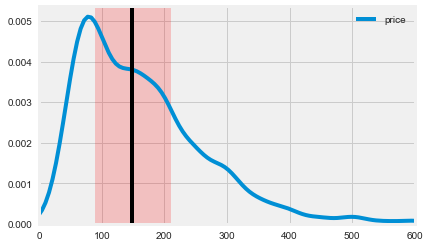

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

sns.kdeplot(y)
ax = plt.gca()
ax.set_xlim([0, 600])
plt.axvline(y.median(), c='black')
ax.add_patch(
    patches.Rectangle((y.median() - root_mse, 0), 2*root_mse, 0.006,
                      color='r', alpha=0.2)
)

In [47]:
r_squared = r2_score(y, y_pred)
r_squared

0.6559237443292674

In [48]:
coefs = list(zip(clf.coef_, fitters.drop('price', axis='columns')))
coefs

[(-0.004079949810746762, 'host_listings_count'),
 (-0.004079949810613631, 'host_total_listings_count'),
 (6.386236816192757, 'accommodates'),
 (11.050122586913176, 'bathrooms'),
 (35.82674334891326, 'bedrooms'),
 (2.934499647735013, 'beds'),
 (6.411946844130824, 'guests_included'),
 (-0.186629281723258, 'number_of_reviews'),
 (0.23843175527691862, 'review_scores_rating'),
 (2.13115392339341, 'amenities_Wireless Internet'),
 (5.584779832727069, 'amenities_Heating'),
 (-14.595427457289524, 'amenities_Kitchen'),
 (-2.669624407801311, 'amenities_Essentials'),
 (-0.4063134652368827, 'amenities_Smoke Detector'),
 (11.211132458646745, 'amenities_Air Conditioning'),
 (-5.094499960559612, 'amenities_Internet'),
 (13.268804149929682, 'amenities_TV'),
 (2.7042320600101775, 'amenities_Carbon Monoxide Detector'),
 (3.4062575649431537, 'amenities_Dryer'),
 (6.529893594519629, 'amenities_Washer'),
 (3.543539963968289, 'amenities_Shampoo'),
 (-13.157643554961082, 'amenities_Hangers'),
 (6.366957070740

In [50]:
neighborhoods = np.unique(listings_df['neighbourhood_cleansed'])
neighborhood_effects = [v for v in coefs if v[1] in neighborhoods]

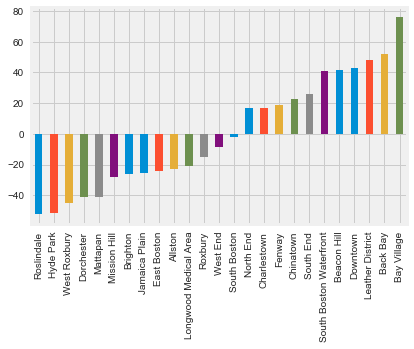

In [51]:
pd.Series(data=[n[0] for n in neighborhood_effects],
          index=[n[1] for n in neighborhood_effects])\
    .sort_values()\
    .plot(kind='bar')

In [52]:
amenity_effects = [v for v in coefs if v[1] in amenities]
pd.Series(data=[n[0] for n in amenity_effects],
          index=[n[1] for n in amenity_effects])\
    .sort_values()\
    .plot(kind='bar')

NameError: name 'amenities' is not defined